 ## R plots and colors<br>
In most **R** functions, you can use named colors, hex, or RGB values. In the simple base **R** plot chart below, `x` and `y` are the point coordinates, `pch` is the point symbol shape, <strong>cex</strong> is the point size, and  `col` is the color. To see the parameters for plotting in base **R**, check out `?par` or `help(par)` <br>
For more info visit :https://www.statmethods.net/advgraphs/parameters.html

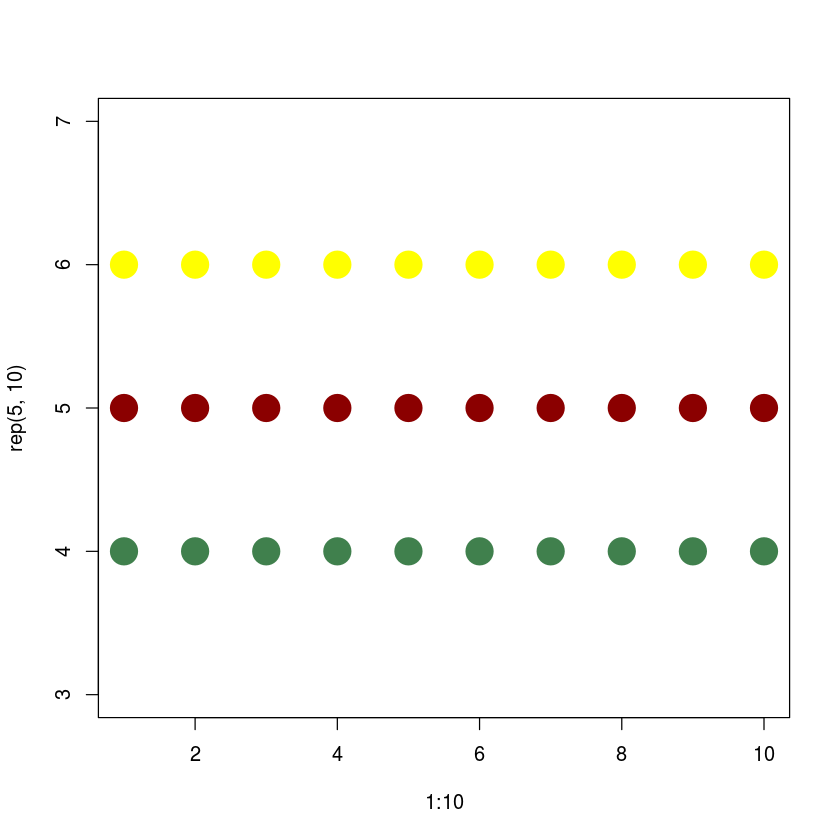

In [1]:
plot(x=1:10, y=rep(5,10), pch=19, cex=3, col="dark red")

points(x=1:10, y=rep(6, 10), pch=19, cex=3, col="557799")

points(x=1:10, y=rep(4, 10), pch=19, cex=3, col=rgb(.25, .5, .3))

You may notice that RGB here ranges from 0 to 1. While this is the **R** default, you can also set it for to the 0-255 range using something like `rgb(10, 100, 100, maxColorValue=255)`.
<br>
We can set the opacity/transparency of an element using the parameter `alpha` (range 0-1):



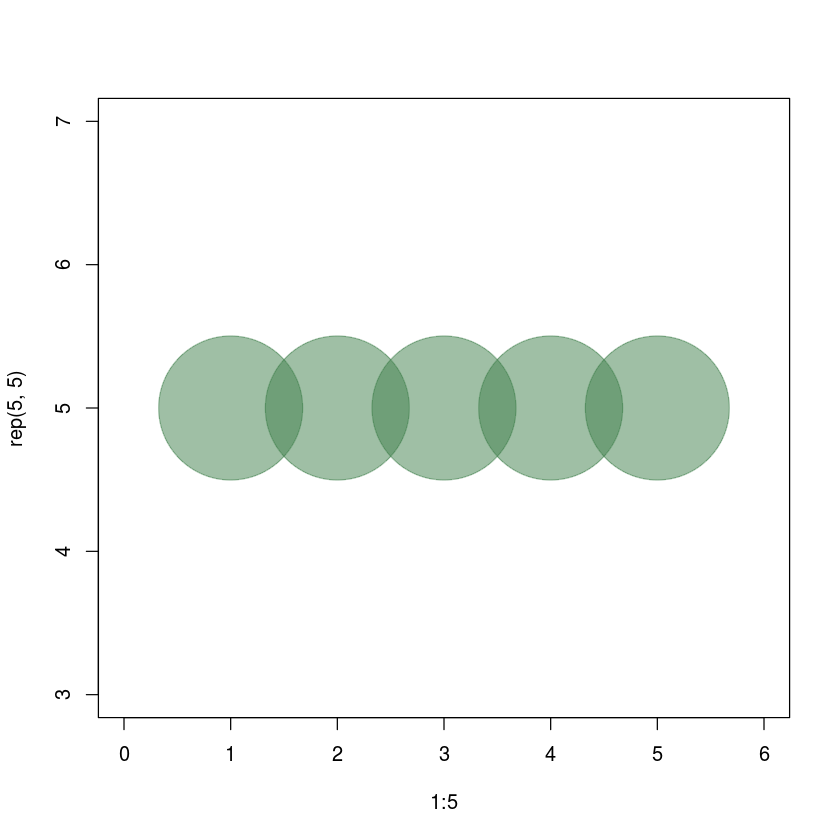

In [13]:
plot(x=1:5, y=rep(5,5), pch=19, cex=16, col=rgb(.25, .5, .3, alpha=.5), xlim=c(0,6))  
#plot(x=1:5, y=rep(5,5), pch=19, cex=16, col=rgb((1:5)/10, (1:5)/8, (1:5)/15, alpha=.7), xlim=c(0,6))  

If we have a hex color representation, we can set the transparency `alpha` using `adjustcolor` from package `grDevices`. For fun, let’s also set the plot background to gray using the `par()` function for graphical parameters.




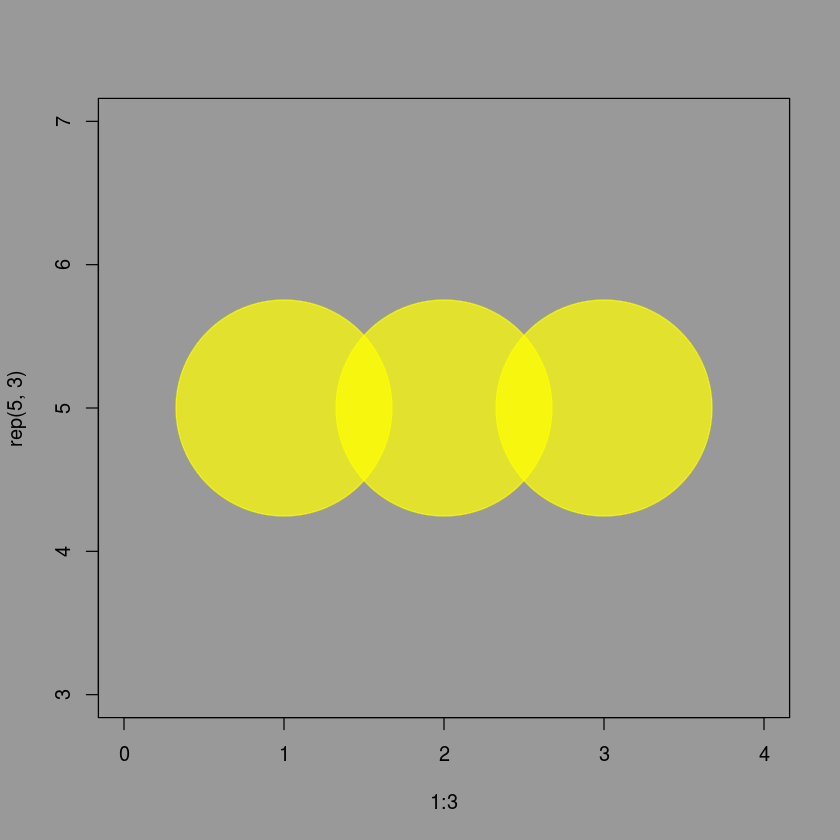

In [22]:
par(bg="gray60")

col.tr <- grDevices::adjustcolor("557799", alpha=0.7)

plot(x=1:3, y=rep(5,3), pch=19, cex=24, col=col.tr, xlim=c(0,4)) 

If you plan on using the built-in color names, here’s how to list all of them:

In [51]:
#colors()                          # List all named colors

#Colors that have "blue" in the name
grep("blue", colors(), value=T)

[1] "aliceblue"       "blue"            "blue1"           "blue2"          
 [5] "blue3"           "blue4"           "blueviolet"      "cadetblue"      
 [9] "cadetblue1"      "cadetblue2"      "cadetblue3"      "cadetblue4"     
[13] "cornflowerblue"  "darkblue"        "darkslateblue"   "deepskyblue"    
[17] "deepskyblue1"    "deepskyblue2"    "deepskyblue3"    "deepskyblue4"   
[21] "dodgerblue"      "dodgerblue1"     "dodgerblue2"     "dodgerblue3"    
[25] "dodgerblue4"     "lightblue"       "lightblue1"      "lightblue2"     
[29] "lightblue3"      "lightblue4"      "lightskyblue"    "lightskyblue1"  
[33] "lightskyblue2"   "lightskyblue3"   "lightskyblue4"   "lightslateblue" 
[37] "lightsteelblue"  "lightsteelblue1" "lightsteelblue2" "lightsteelblue3"
[41] "lightsteelblue4" "mediumblue"      "mediumslateblue" "midnightblue"   
[45] "navyblue"        "powderblue"      "royalblue"       "royalblue1"     
[49] "royalblue2"      "royalblue3"      "royalblue4"      "skyblue"        
[53] "skyblue1"        "skyblue2"        "skyblue3"        "skyblue4"       
[57] "slateblue"       "slateblue1"      "slateblue2"      "slateblue3"     
[61] "slateblue4"      "steelblue"       "steelblue1"      "steelblue2"     
[65] "steelblue3"      "steelblue4"

In many cases, we need a number of contrasting colors, or multiple shades of a color. **R** comes with some predefined palette function that can generate those for us. For example:

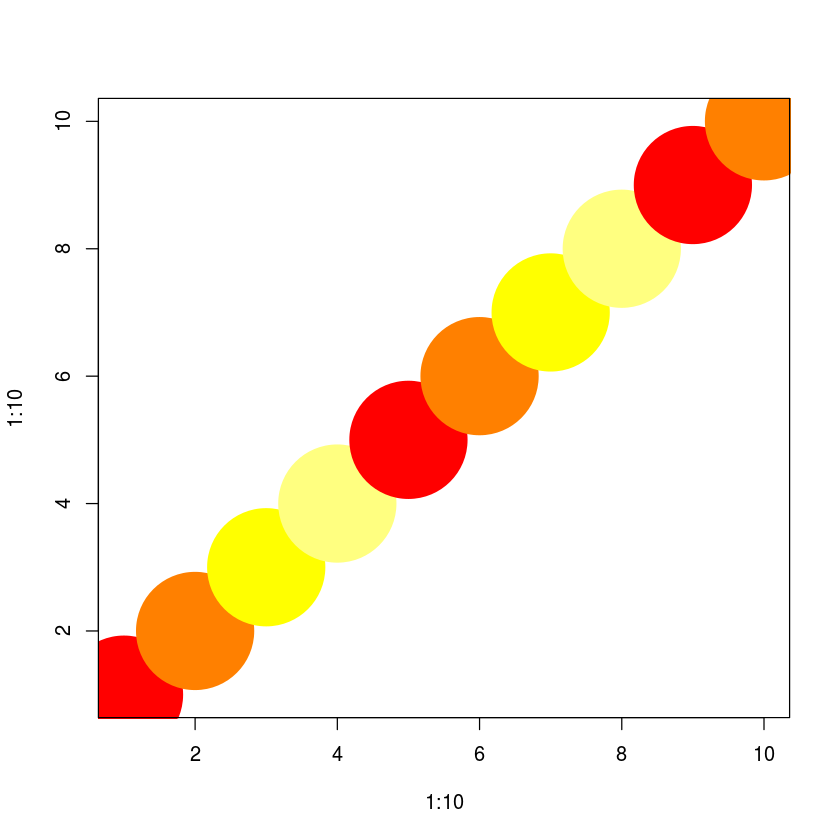

In [33]:
pal1 <- heat.colors(4, alpha=1)   #  5 colors from the heat palette, opaque

pal2 <- rainbow(5, alpha=.5)      #  5 colors from the rainbow palette, transparent

plot(x=1:10, y=1:10, pch=19, cex=13, col=pal1)
#plot(x=1:10, y=1:10, pch=19, cex=13, col=pal2)

We can also generate our own gradients using `colorRampPalette`. Note that `colorRampPalette` returns a function that we can use to generate as many colors from that palette as we need.


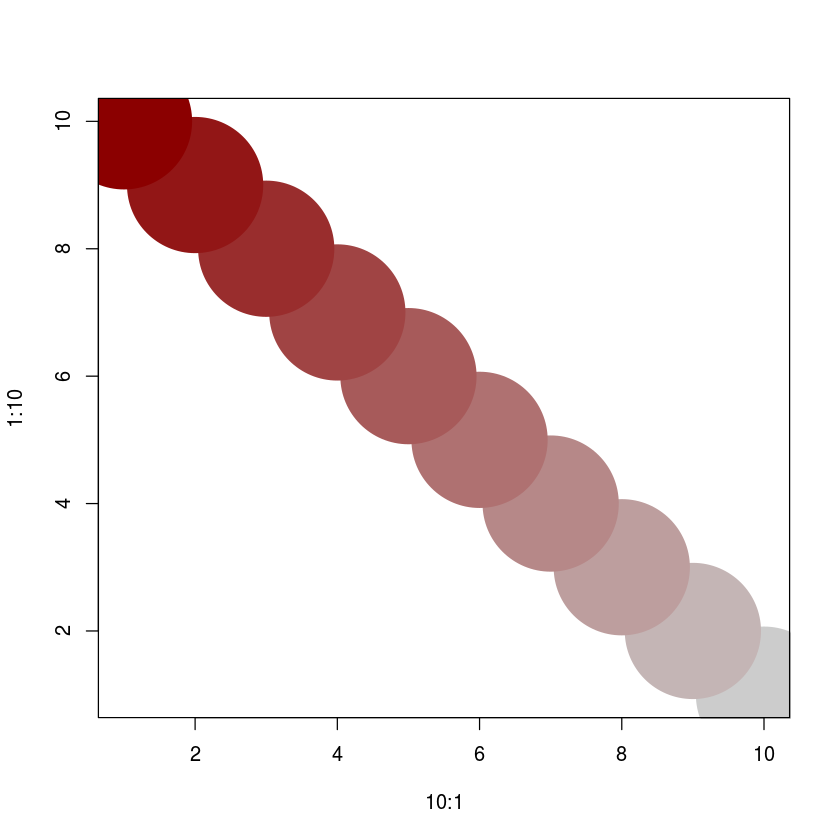

In [70]:
palf <- colorRampPalette(c("gray80", "dark red")) 
plot(x=10:1, y=1:10, pch=19, cex=15, col=palf(10)) 


To add transparency to `colorRampPalette`, you need to use a parameter `alpha=TRUE`:

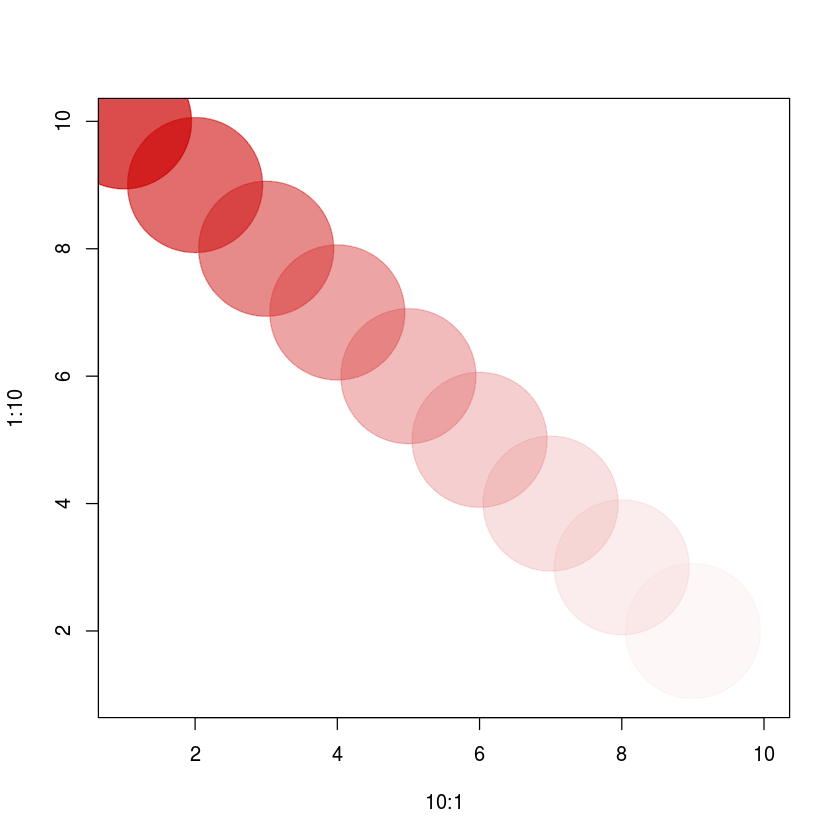

In [64]:
palf <- colorRampPalette(c(rgb(1,1,1, .2),rgb(.8,0,0, .7)), alpha=TRUE)

plot(x=10:1, y=1:10, pch=19, cex=15, col=palf(10)) 

## **R** troubleshooting

While I generate many (and often very creative) errors in **R**, there are three simple things that will most often go wrong for me. Those include:
1. `Capitalization`: **R** is case sensitive - a graph vertex named “Jack” is **not** the same as one named “jack”. The function rowSums won’t work if spelled as rowsums or RowSums.
2. `Object class`: While many functions are willing to take anything you throw at them, some will still surprisingly require character vector or a factor instead of a numeric vector, or a matrix instead of a data frame. Functions will also occasionally return results in an unexpected formats.
3. `Package namespaces`: Occasionally problems will arise when different packages contain functions with the same name. R may warn you about this by saying something like “The following object(s) are masked from 'package:igraph’ as you load a package. One way to deal with this is to call functions from a package explicitly using `::`. For instance, if function `blah()` is present in packages `A` and `B`, you can call `A::blah` and `B::blah`. In other cases the problem is more complicated, and you may have to load packages in certain order, or not use them together at all. For example (and pertinent to this workshop), `igraph` and `Statnet` packages cause some problems when loaded at the same time. It is best to detach one before loading the other.

In [71]:
library(igraph)          # load a package

detach(package:igraph)   # detach a package


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



For more advanced troubleshooting, check out `try()`, `tryCatch()`, and `debug()`.